# Exploratory Data Analysis (EDA) with Titanic Dataset

This notebook demonstrates **Exploratory Data Analysis (EDA)** on the classic **Titanic** dataset. We'll be using **Seaborn**'s built-in Titanic data. By the end of this tutorial, you should understand how to:

1. Load and inspect data
2. Identify and handle missing values
3. Visualize distributions of numeric/categorical features
4. Examine relationships between features (e.g., correlation, grouping)
5. Create informative data visualizations (Seaborn + Matplotlib)

*Let's begin!*

## 1. Installation and Imports

We'll install any necessary libraries (if needed) and import them.

In [ ]:
import sys
!{sys.executable} -m pip install --quiet seaborn matplotlib pandas

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

# Let's set some display options

# Show all columns (no column truncation)
pd.set_option('display.max_columns', None)

# (Optional) Show all rows (no row truncation)
pd.set_option('display.max_rows', None)

# (Optional) Don't truncate long text fields in cells
pd.set_option('display.max_colwidth', None)

sns.set_style('whitegrid')  # Seaborn style

## 2. Load the Titanic Dataset

Seaborn provides a few **built-in datasets**, including `titanic`. Let's load it and take a look.

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


The columns include:
- `survived` (0 = No, 1 = Yes)
- `pclass` (Passenger class)
- `sex`
- `age`
- `sibsp` (# of siblings/spouses aboard)
- `parch` (# of parents/children aboard)
- `fare` (ticket fare)
- `embarked` (port of embarkation)
- `class` (same as `pclass` but as a string)
- `who` (`man`, `woman`, or `child`)
- `adult_male`
- `deck`
- `embark_town` (town of embarkation)
- `alive` (string: `yes`/`no`)
- `alone` (boolean indicating if passenger was alone)


### 2.1 Basic Overview
Let's check the **shape**, **info**, and some **summary statistics**.

In [ ]:
print("Shape:", titanic.shape)
print("\nInfo:")
print(titanic.info())

Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [2]:
titanic.describe(include='all')

NameError: name 'titanic' is not defined

From `.info()`, we can see some columns have **missing values** (`age`, `embarked`, `deck`, `embark_town`). Let's dig deeper into missing data next.

## 3. Handling Missing Values
We can look at how many missing values each column has.

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


- `deck` has 688 missing
- `age` has 177 missing
- `embark_town` has 2 missing
- `embarked` has 2 missing

We could drop some columns or try to **impute** them. For EDA, let's decide:
- Possibly **drop** `deck` entirely (it's mostly missing)
- Fill missing `age` with the median or mean, or keep them as is for some analyses
- For `embark_town`/`embarked`, fill with the mode (most common) or drop them

We'll demonstrate dropping `deck` and filling the two missing `embarked` rows with the **mode** (most common).

In [ ]:
titanic.drop(columns='deck', inplace=True)
embark_mode = titanic['embarked'].mode()[0]
titanic['embarked'].fillna(embark_mode, inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

print("Remaining missing values:")
titanic.isnull().sum()

Remaining missing values:


<ipython-input-20-800f1b0c902b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(embark_mode, inplace=True)
<ipython-input-20-800f1b0c902b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


Now, the only missing values are in `age`. We can decide whether to fill them or not. Let's leave them as is for the moment. Let's move on to some **univariate analysis**.

## 4. Univariate Analysis
### 4.1 Distribution of `age`
We'll look at the **distribution** of passengers' ages using Seaborn's `histplot`.

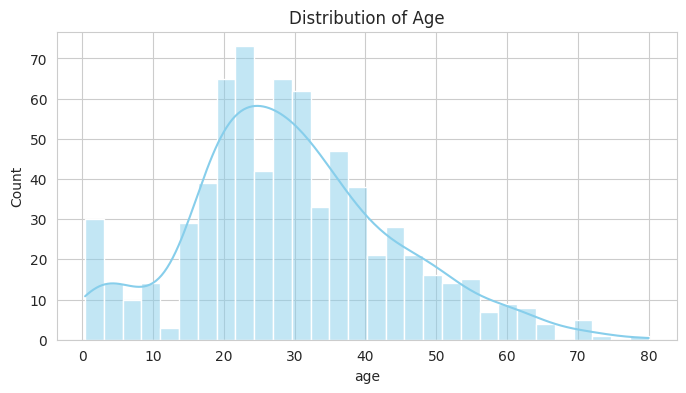

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=titanic, x='age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.show()

We see the age distribution is somewhat skewed to the right, with a lot of passengers in their 20s-30s. There's a small group of children as well.

### 4.2 Distribution of `fare`
We can also check the ticket fares. Let's do another histogram.

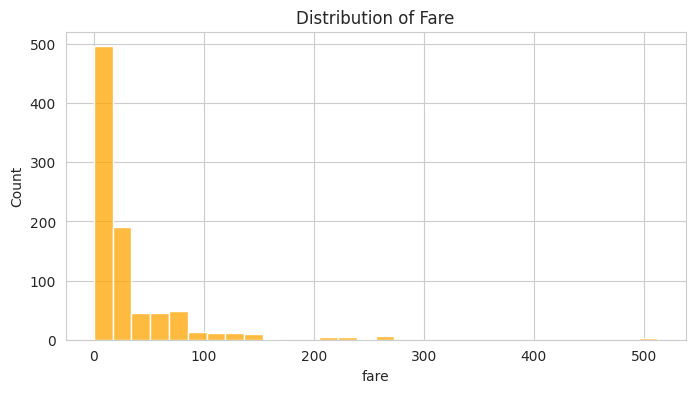

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=titanic, x='fare', bins=30, kde=False, color='orange')
plt.title('Distribution of Fare')
plt.show()

A large number of fares are relatively low, with some extremely high outliers. Let's do a **boxplot** next to see these outliers more clearly.

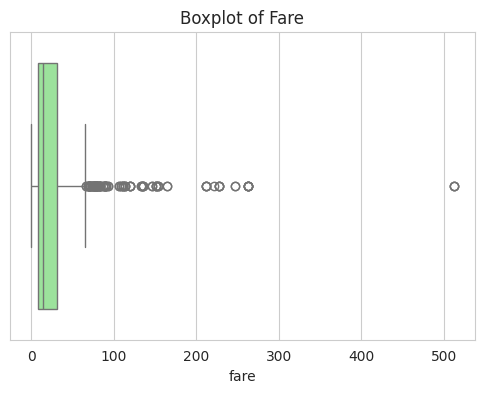

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=titanic, x='fare', color='lightgreen')
plt.title('Boxplot of Fare')
plt.show()

There's a long right tail with some very high fares, which indicates a **right-skewed** distribution.

### 4.3 Categorical Features
Let's look at the count distributions for `sex`, `pclass`, and `embarked`.

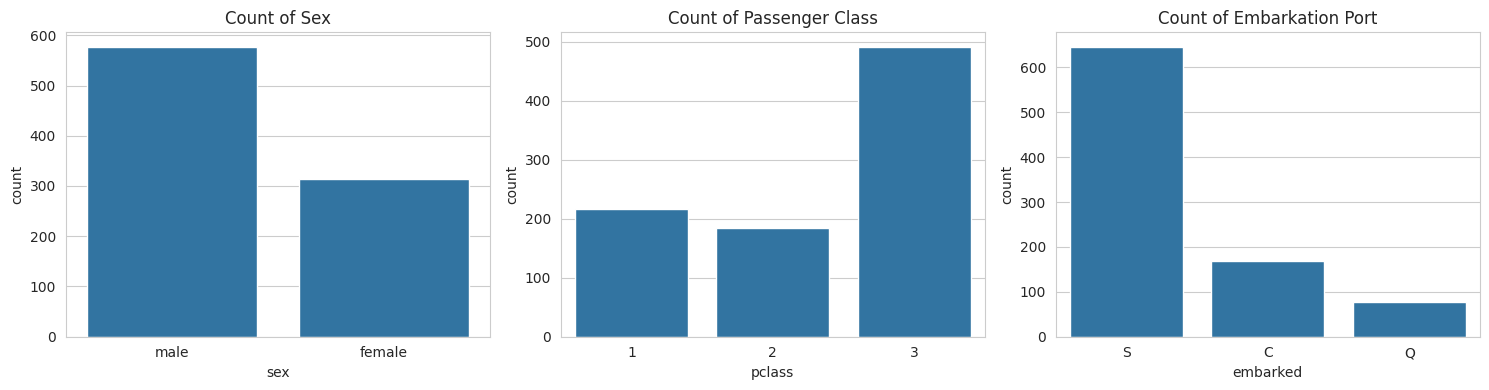

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(ax=axes[0], data=titanic, x='sex')
axes[0].set_title('Count of Sex')

sns.countplot(ax=axes[1], data=titanic, x='pclass')
axes[1].set_title('Count of Passenger Class')

sns.countplot(ax=axes[2], data=titanic, x='embarked')
axes[2].set_title('Count of Embarkation Port')

plt.tight_layout()
plt.show()

From these plots:
- **Sex**: More males than females.
- **pclass**: A majority are in 3rd class, fewer in 1st and 2nd.
- **embarked**: Most passengers boarded at Southampton (`S`).

## 5. Bivariate Analysis
### 5.1 Survival Rate by Categorical Features
We can explore survival rates across different categories to see patterns.

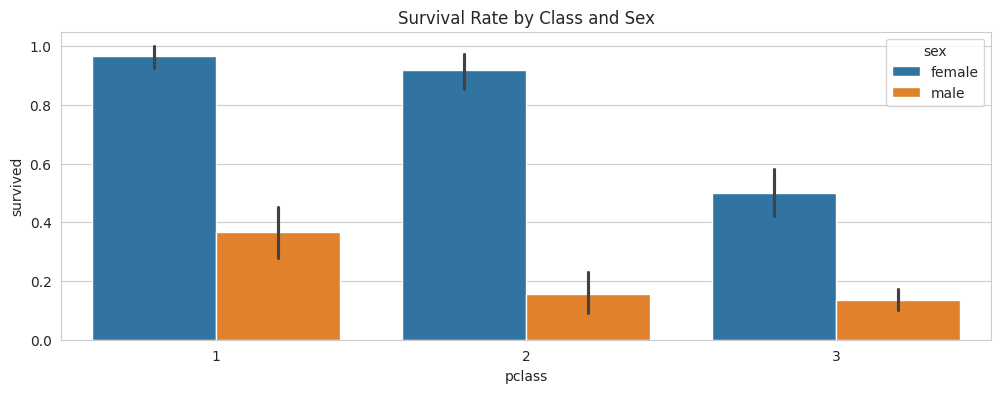

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(data=titanic, x='pclass', y='survived', hue='sex')
plt.title('Survival Rate by Class and Sex')
plt.show()

Observations:
- **Females** had a higher survival rate than males overall.
- Within each class, **1st class** had a higher survival rate. **3rd class** males, in particular, had the lowest survival rate.

### 5.2 Relationship between `age` and `fare`
Let's do a **scatter plot** to see if there's a visible relationship between `age` and `fare`.

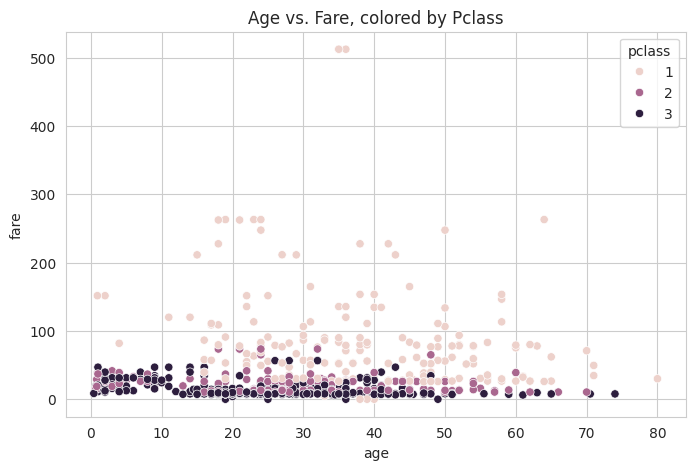

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=titanic, x='age', y='fare', hue='pclass')
plt.title('Age vs. Fare, colored by Pclass')
plt.show()

We see many younger passengers in 3rd class paying lower fares, while higher fares are mostly associated with 1st class. There's no strong correlation between age and fare in general (besides the class separation).

### 5.3 Correlation Heatmap
We can check **numeric** correlations among columns: `survived`, `pclass`, `age`, `sibsp`, `parch`, `fare`.

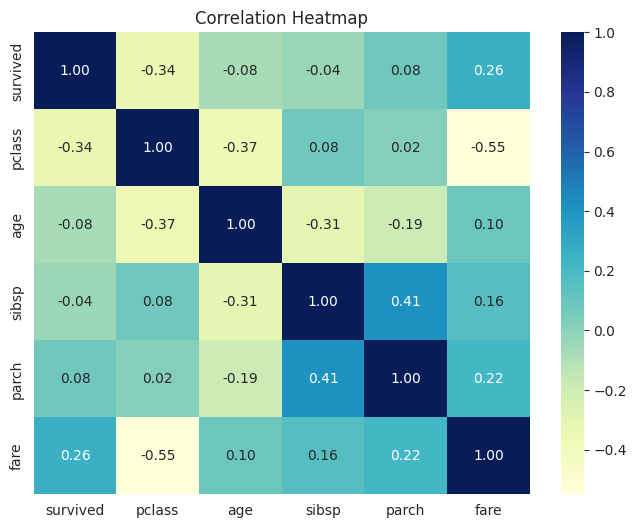

In [ ]:
# Subset the numeric columns of interest
numeric_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
corr_matrix = titanic[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Observations:
- `survived` is **negatively** correlated with `pclass` (since `pclass` is 1,2,3, but 1st class had higher survival).
- `fare` has a moderate **negative** correlation with `pclass` (1st class typically has higher fares, but 1st class is coded as `1`, so numeric correlation is negative).
- `age` shows minimal correlation with survival or fare.
- `sibsp` and `parch` do not have strong correlations with survival.

## 6. Additional Analysis Ideas
1. **Group** the dataset by `sex` or `embarked` and compute summary statistics.
2. Investigate **age** distribution among survivors vs. non-survivors.
3. Explore how `alone` might relate to survival.
4. Possibly transform `fare` (e.g., log scale) if doing advanced modeling or further correlation analysis.

## 7. Challenge: Try It Yourself

1. **Fill** the missing `age` values with your chosen method (mean, median, or random sample) and see if it changes any distribution.
2. **Create** a new feature. For example, categorize `age` into child/teen/adult/elderly, then analyze how it relates to survival.
3. **Compare** survival rates by `embark_town`.
4. Make additional **plots** (boxplot, violinplot, catplot) to uncover new insights.

Feel free to experiment and see what interesting facts you can discover about the Titanic passengers!

## 8. Summary

In this tutorial, we:

1. **Loaded** the Titanic dataset (Seaborn)
2. **Checked** for missing data and handled it (dropped `deck`, filled `embarked`)
3. Explored **univariate** distributions (histograms for `age`, `fare`)
4. Looked at **bivariate** relationships with bar plots, scatter plots, and a correlation heatmap

**EDA** is about asking questions, iterating, and discovering patterns in your data. Practice exploring different angles, and you’ll build strong intuition for data analysis!